## マルコフ連鎖モンテカルロ法による共重合組成の数値的解法



[目次]  
・概要  
・共重合組成式  
・Alfrey-PriceのQ,e-Scheme  
・モンテカルロ法  
・マルコフ連鎖  
・マルコフ連鎖モンテカルロ法  
・多元共重合組成の数値的解法

概要

高分子設計では、モノマーの投入比率が最終製品の物性に大きな影響を与えます。この投入比率は、連鎖重合による材料開発において重要な要素です。物性への影響は、モノマーの配合比によって線形に加わる場合もあればそうでない場合もあります。この違いの背後には、高分子の一次配列（シーケンス）の影響が考えられます。モノマーがポリマー鎖にどのように組み込まれるか、つまり均一かつランダムに導入されるかは、非常に重要な問いです。以下に具体例を示します。

例えば、スチレン（St）とメチルメタクリレート（MMA）を50/50の比率で混合し、溶液系で攪拌しながらラジカル重合を行った場合を考えます。生成するポリマー鎖の配列は、NMRスペクトルによる連子解析を通じて以下のように推定されるかもしれません：

MMA-MMA-St-MMA-St-St-St-MMA-MMA-St-St-MMA-St-St-MMA-St-MMA-St

この配列からは、StとMMAが交互になることもあれば、同種のモノマーが連続して共重合することも観察されます。これはランダム共重合と呼ばれます。一方、スチレン（St）と無水マレイン酸（MAH）を組み合わせた共重合では、以下のようにモノマーが交互に付加することが知られています：

St-MAH-St-MAH-St-MAH-St-MAH-St-MAH-St-MAH-St-MAH-St-MAH-St-MAH

これは交互共重合体と呼ばれ、StラジカルがMAHモノマーに、MAHラジカルがStモノマーに選択的に付加することによるものです。この選択性は、モノマーとラジカル種の反応性（反応速度）が組み合わせによって異なるために生じます。

### Alfray-Price のQe-Scheme
  先述のようなSt/MMA系とSt/MAH系の一次構造の違いは、モノマーの反応性比によって説明される。反応性比とは、2種類のモノマーAとBを共重合させた際に、AtoAのホモ付加反応が進行する速度 kAAと、AtoBのヘテロ付加反応が進行する速度kABの比によって記述される。  
即ち、反応性比ｒABは  
$$r_{AB} = \frac{k_{AA}}{ k_{AB}}$$

である。さて、この反応性比はモノマーを共重合した際にどのような共重合様式をたどるかを決める因子になる。反応性比の実測方法として、Fineman-Loss法が有名である。ここでは、反応性比を実測する方法ではなく、パラメータによる推定方法としてよく知られているAlfrey-PriceのQe-Schemeについて説明する。Qe-Schemeとは、モノマーの二重結合に対し、Q値とe値の2つの因子を仮定し、それらからモデル式に当てはめて反応速度定数を予測する方法である。Q値は二重結合の共鳴安定性に関する因子、e値は二重結合の電子吸引性に関する因子である。$M_A$ラジカルと$M_B$モノマーの反応速度定数$k_{AB}$は次式で表される。  

$$M_A*\ +\ M_B\ ->\ M_A-M_B*$$
$$k_{AB}=P_{A}Q_{B}exp(-e_{A}e_{B})$$

反応速度はAラジカルの活性が高く、Bラジカルが安定であるほど早い。そして、付加するモノマー同士は電子供与性と電子吸引性の組み合わせ(ドナーとアクセプターの関係)であるほど早いことを意味する。

### 反応速度から反応確率を導く
Qe-Schemeにより任意のモノマーの反応速度が表現できることが分かった。したがって反応性比もQe-Schemeにより表現できる。今回は反応性比と似た考え方で、反応確率を定義した。反応確率は、活性種が起こしうる全ての反応に対する、特定の反応が起こる確率として考える。例えばAラジカルからBモノマーへの付加反応確率$P_{AB}$について考えると、
$$M_A*\ +\ M_A\ ->\ M_A-M_A*\ \ \ \ \ \ (1)$$
$$M_A*\ +\ M_B\ ->\ M_A-M_B*\ \ \ \ \ \ (2)$$  

の二つの反応が起こりうる。ここで、反応(1)の反応速度が反応(2)の反応速度の2倍だとすれば,(1)が起きる確率は66%,(2)が起きる確率は33%であると考えられる。
つまり$M_A*$ラジカルが起こしうる付加反応速度全体に対する$M_B$モノマーへの付加反応速度$k_{AB}$の分率によって表現できる。 即ち、一般化すると、

$$P_{AB}=\frac{R_{AB}}{R_{AB}+R_{AA}}$$  
$$=\frac{k_{AB}[M_{A}*][M_{B}]}{k_{AB}[M_{A}*][M_{B}]+k_{AA}[M_{A}*][M_{A}]} $$  
$$=\frac{k_{AB}[M_{B}]}{k_{AB}[M_{B}] + k_{AA}[M_{A}]} $$  

ここで、Alflay-priceの式を用いて式を整理すると  

$$=\frac{[M_{B}]P_{B}Q_{A}exp(-e_{A}e_{A}) }{[M_{B}]P_{A}Q_{B}exp(-e_{A}e_{B})+[M_{A}]P_{A}Q_{A}exp(-e_{A}e_{A})}$$   
$$=\frac{[M_{B}]Q_{B}exp(-e_{A}e_{B}) }{[M_{B}]Q_{B}exp(-e_{B}e_{A})+[M_{A}]Q_{A}exp(-e_{A}e_{A})}$$  

### 多元共重合への拡張  
上記の例は二種類のモノマー間の関係である。つまりに二元共重合における反応を考えている。一方で、実際には多数のモノマーを組み合わせて重合を行う場合が多く、そのような重合系のモノマー消費挙動を表現するには、上記の反応性比の概念を拡張して利用する必要がある。今、N種のモノマー$M_1$,$M_2$...$M_A$...$M_B$...$M_n$を共重合させた系における、ラジカル$M_A*$からモノマー$M_B$へのラジカル付加反応  

$$M_A*\ +\ M_B\ ->\ M_A-M_B*$$  

の反応確率を$P_{AB}$とすると、

$$P_{AB}= \frac{[M_{B}]Q_{B}exp(-e_{A}e_{B}) }{\sum_{i=1}^n [M_{i}]Q_{i}exp(-e_{A}e_{i})}\ \ \ (1 \leqq i \leqq n)$$




### モノマーの反応性比と共重合様式の決定

スチレン（St）/メチルメタクリレート（MMA）系とスチレン（St）/無水マレイン酸（MAH）系の一次構造の違いは、モノマーの反応性比によって説明されます。反応性比とは、2種類のモノマーAとBを共重合させた際、AからAへのホモ付加反応速度 kAAとAからBへのヘテロ付加反応速度kABの比率を示し、
​$$r_{AB} = \frac{k_{AA}}{ k_{AB}}$$
 で表されます。この比率は、共重合する際のモノマーの振る舞いや生成するポリマーの構造を予測するのに役立ちます。

### Alfrey-PriceのQe-Scheme

モノマーの反応性比を実測する方法としてはFineman-Ross法が知られていますが、ここでは実験的手法ではなく、経験的パラメータに基づく反応性比予測理論である、Alfrey-PriceのQe-Schemeを用いた推定方法について説明します。このスキームでは、モノマーの二重結合に対する共鳴安定性を示すQ値と、二重結合の電子吸引性を示すe値という2つのパラメータを用いて、反応速度定数をモデル式に当てはめて予測します。

Qeスキームの考え方として、ラジカルとモノマーの反応速度定数は、活性ラジカルAの反応性と安定なラジカルBの反応性、および電子供与性と電子吸引性の組み合わせによって決まると仮定しています。(ドナーとアクセプターの関係)この

これにより、特定のモノマー間での反応確率を算出することができます。

反応確率の導出

Qe-Schemeに基づき、任意のモノマーの反応速度が表現できるため、反応確率も同様に表現できます。反応確率は、活性種が起こしうる全ての反応における、特定の反応が起こる確率です。例えば、AラジカルからBモノマーへの付加反応確率は、Aラジカルが起こしうる全ての付加反応速度に対する、特定のモノマーへの付加反応速度の割合によって決まります。

## 多元共重合への拡張

上記の説明は二元共重合における反応に限定されていますが、実際には多種類のモノマーを組み合わせた重合が行われることが多いです。このような多元共重合システムのモノマー消費挙動を理解するためには、反応性比の概念を拡張して適用する必要があります。N種類のモノマーを共重合させた場合の、特定のラジカルから特定のモノマーへの付加反応確率は、全ての可能なラジカル付加反応速度に対するその反応速度の割合として定義できます。

In [1]:
100/6

16.666666666666668

### 前提1: モンテカルロ法
モンテカルロ法は、一様乱数の生成による試行を繰り返すことで確率分布の数値解の導出を行う手法である。確率分布を解析的に得ることが困難な事象に対して強力なツールです。簡単に言えば、実際の現象に近い確率密度分布を持つ「ひずんださいころ」を何度も投げることで、統計的データを生成し、現象を再現する事です。


### 前提2 確率密度分布とは
確率密度分布とは、起こりうる各事象について、その事象が発生する確率の割り当て(分布)のことです。通常、起こりうる事象変数をy,　発生確率をP(y)とした関数としてあらわされます。例えば、さいころを投げた時に、発生しうる事象とそれが起こる確率は



In [2]:
import numpy as np
import pandas as pd

x = [1,2,3,4,5,6]
y = [100/6 for _ in x]
df = pd.DataFrame([y])
df.columns = x
df.index=["P(y)"]
print(df)

              1          2          3          4          5          6
P(y)  16.666667  16.666667  16.666667  16.666667  16.666667  16.666667


このとき、1~6のいずれの数字においても起こる確率分布は0.166です。さいころの場合には、
事象がカテゴリ変数である為、不連続な値を取りますが、連続した値をとこともできるはずです。
その場合には、binごとの確率分布をbinの幅で割った値を考える必要があり、この値が確率密度です。
そして、事象変数に対する確率密度の分布が、確率密度分布となります。

たとえば、平均0,標準偏差1のガウス分布は下記のようになります。
ガウス分布の確率密度関数は以下の式で与えられます。

$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$


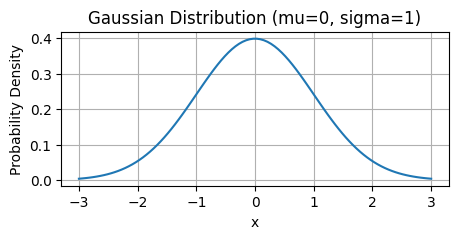

In [3]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# 平均と標準偏差を定義
mu = 0  # 平均
sigma = 1  # 標準偏差

# ガウス分布（正規分布）のPDF（確率密度関数）をプロット
x = np.linspace(-3*sigma + mu, 3*sigma + mu, 100)
y = norm.pdf(x, mu, sigma)
plt.figure(figsize=(5,2))
plt.plot(x, y)
plt.title('Gaussian Distribution (mu=0, sigma=1)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

この確率密度分布に従う統計データを疑似的に生成することが出来ます。
確率変数xを、幅0.5のbinに分割して、各確率分布を算出してみます。


array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5])

In [218]:

bin_width=0.5
x_bins = np.arange(-10,10,bin_width)

from scipy.integrate import quad

# 平均と標準偏差を定義
mu = 0  # 平均
sigma = 1  # 標準偏差



# 確率密度関数(ここではガウス関数)
def gauss_function(x, mu=0, sigma=1):
    f1 = norm.pdf(x, mu, sigma)
    return f1

# 積分範囲　-∞　~　xの範囲は、生成した乱数がその範囲に該当するかどうかを判別
intg_ls =[]

for x in x_bins:
    integral, error = quad(gauss_function, -np.inf, x)
    intg_ls.append(integral)
    

In [219]:


def montecalro_dice(intg_ls):
    #初期化
    out = 0
    #0~1の一様乱数を生成
    random_number=np.random.random()

    #生成した乱数がどのbinに該当するかを判別する。
    for n,prob in enumerate(intg_ls):
        if random_number <=prob:
            out = x_bins[n]
            break
    return out
                

In [220]:
sampling_num = 10000
sampling_data= []

for _ in range(sampling_num):
    data_x = montecalro_dice(intg_ls)
    sampling_data.append(data_x)

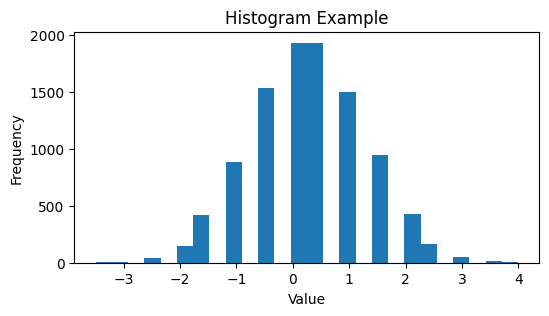

In [221]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(6,3))

# ヒストグラムの描画
plt.hist(sampling_data,bins=26)
# タイトルと軸ラベルの追加
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# ヒストグラムの表示
plt.show()
